Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 101, 1301)
numOfArrays:  21
shape:  (101, 1301)


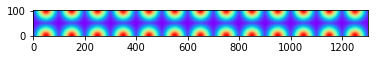

In [1]:
## plot plasma density

%pylab inline
import numpy as np
from matplotlib import pyplot as plt

from ReadBinary import *

filename = "../data/Wp2-x.data"
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

Wp2 = GetArrays(filename, 0, 1)[0,0,:,:]
print("shape: ", Wp2.shape)

shape = Wp2.shape

plt.figure(figsize=(6, 6*(shape[0]/shape[1])))
plt.imshow(np.real(Wp2[:,:]), cmap="rainbow", origin='lower', aspect='auto')
plt.show()

In [7]:
## animate Electric field

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
from ReadBinary import *

filename = "../data/E-x.data"
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename, indStart=-500, indEnd=None)[:, 0, :, :]
print("shape: ", E.shape)

shape = E.shape[1:]

plt.ion()
plt.figure(figsize=(7,6*(shape[0]/shape[1])))

for n in range(E.shape[0]):
    plt.clf()
    plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto')
    plt.colorbar()
    plt.pause(0.05)

Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 101, 1301)
numOfArrays:  2001
shape:  (500, 101, 1301)


In [3]:
%pylab tk

shape = E.shape[1:]
ion()

nz_ignore = 300

for n in range(E.shape[0]): 
    clf()
    plot(E[n, int(shape[0]/2), nz_ignore:])
    pause(0.05)


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
## Get Spectrum 1D

E = GetArrays(filename, indStart=-600, indEnd=None)[:, 0, :, :]
shape = E.shape
print("shape : ", shape)

Nt, Ny, Nz = shape
print("Nt: {},   Ny: {},   Nz: {}".format(Nt, Ny, Nz))

#E_tz = np.sum(E, axis=1)/Ny
E_tz = E[:, int(Ny/2), nz_ignore:]

E_f = np.fft.fft2(E_tz)

shape :  (600, 101, 1301)
Nt: 600,   Ny: 101,   Nz: 1301


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


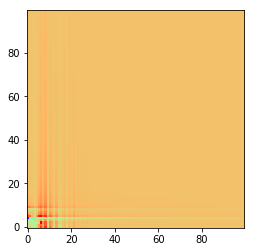

In [6]:
%pylab inline
imshow(np.real(E_f)[0:100, 0:100], origin="lower", cmap="rainbow")


In [33]:
## Get Spectrum 2D

E = GetArrays(filename, indStart=-600, indEnd=None)[:, 0, :, :]
shape = E.shape
print("shape : ", shape)

nz_ignore = 300

Nt, Ny, Nz = shape
print("Nt: {},   Ny: {},   Nz: {}".format(Nt, Ny, Nz))

E_tz = (np.sum(E, axis=1)/Ny)[:, nz_ignore:]
#E_tz = E[:, int(Ny/2), nz_ignore:]

Nky, Nkz = 100, 100
Nw = 100

ky_max, kz_max = 4.0*np.pi, 4.0*np.pi
w_max = 30.0

w = np.linspace(0, w_max, Nw)
kz = np.linspace(0, kz_max, Nkz)
E_f = np.zeros((Nw, Nkz), dtype=complex)

S = 0.95
dy = 10/Ny
dz = 12/Nz
dt = 1.0/np.sqrt(1.0/dy**2 + 1.0/dz**2)*S

t = np.linspace(0.0, Nt*dt, Nt, endpoint=True)
z = np.linspace(0.0, Nz*dz, Nz)[nz_ignore:]

t_mesh, z_mesh = np.meshgrid(t, z, indexing="ij")

for i in range(Nw):
    w_i = w[i]
    print(i, end=" ")
    for j in range(Nkz):
        kz_j = kz[j]
        E_f[i, j] = np.sum(E_tz*np.exp(-1j*w_i*t_mesh + 1j*kz_j*z_mesh))
        
E_f *= dt*dy/(2.0*np.pi)**2




shape :  (600, 101, 1301)
Nt: 600,   Ny: 101,   Nz: 1301
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


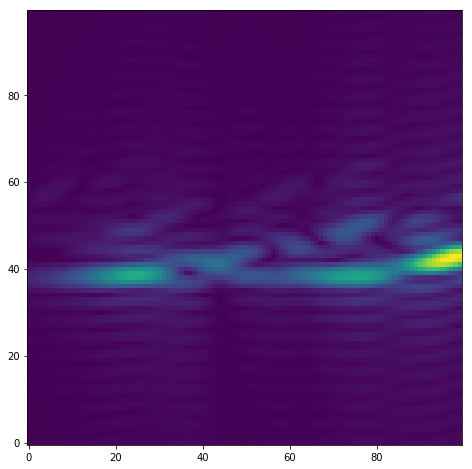

In [34]:
%pylab inline
figsize(8, 8)

E_f_max = np.max(np.abs(E_f))

imshow(np.abs(E_f), origin="lower")